<a href="https://colab.research.google.com/github/lara-sj/KNN-demo/blob/main/Predicting_House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting House Sale Prices in Ames, Iowa

## Introduction

### Objective
We will be working with housing data for the city of Ames, Iowa from 2006 to 2010 (???). We will train a model to predict prices based on 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa. 

### Practice Skills
1. Data Ingestion with training/ validation/ test splits
2. Exploratory Data Analysis - visualization of key variables
3. Feature Engineering/ Data Transformation
4. Model Creation - 2 different types of models of your choice
5. Results interpretation and submission to Kaggle


### Context
The Ames Housing dataset was compiled by Dean De Cock as a modernised alternative to the often cited Boston Housing dataset. For more information, please see [here](https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627).

### Metadata
Descriptions of the files and columns used can be found on this [Kaggle link](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).

## Environment Setup

### Import libraries & upload files

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving data_description.txt to data_description (6).txt
Saving sample_submission.csv to sample_submission (6).csv
Saving test.csv to test (6).csv
Saving train.csv to train (6).csv


### Load & check training data

In [ ]:
ames = pd.read_csv('train.csv')
ames.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
ames.shape

(1460, 81)

In [ ]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**Observations - Training Data**
* missing values in - `LotFrontage`, `Alley`, `MasVnrType`, `MasVnrArea`, etc
* we have both categorical & numerical values 


### Load & check test data

In [ ]:
ames_test = pd.read_csv('test.csv')
ames_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
ames_test.shape

(1459, 80)

## Exploratory Analysis

### Exploring Sale Price

In [ ]:
ames['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

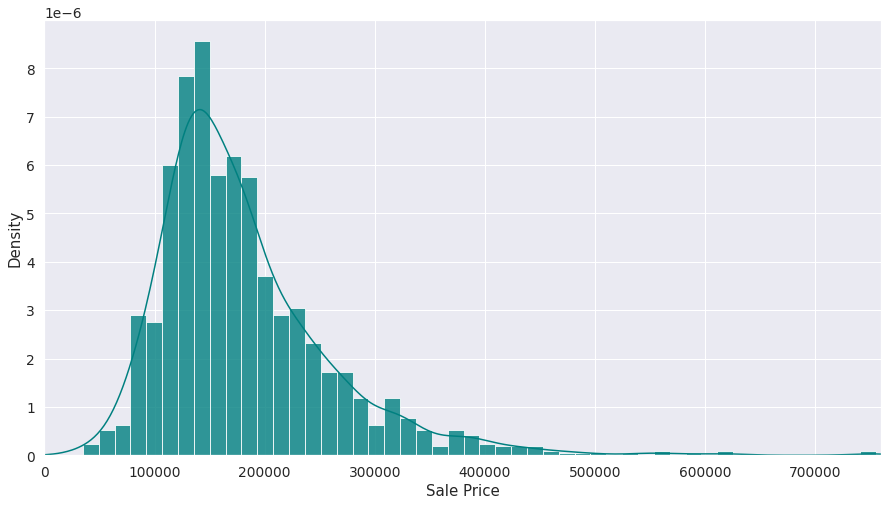

In [ ]:
plt.figure(figsize=(15,8))
ax = ames['SalePrice'].hist(bins=50, density=True, stacked=True, color='teal', alpha=0.8)
ames['SalePrice'].plot(kind='density', color='teal')
ax.set(xlabel='Sale Price')
plt.xlim(0,760000)
plt.show()

### Sale Price - Observations
* average price = 180,921
* maximum price = 755,000
* minimum price = 34,900
* left-skewed

**Skewness - degree of distortion from the normal distribution (positive skew).**

**Kurtosis = tails of distribution; used to describe extreme values in one versus the other tail (measures of outliers)
High kurtosis - need to investigate why we have many outliers. It could indicate wrong data entry or other things.. INVESTIGATE!**

### Overall Correlation



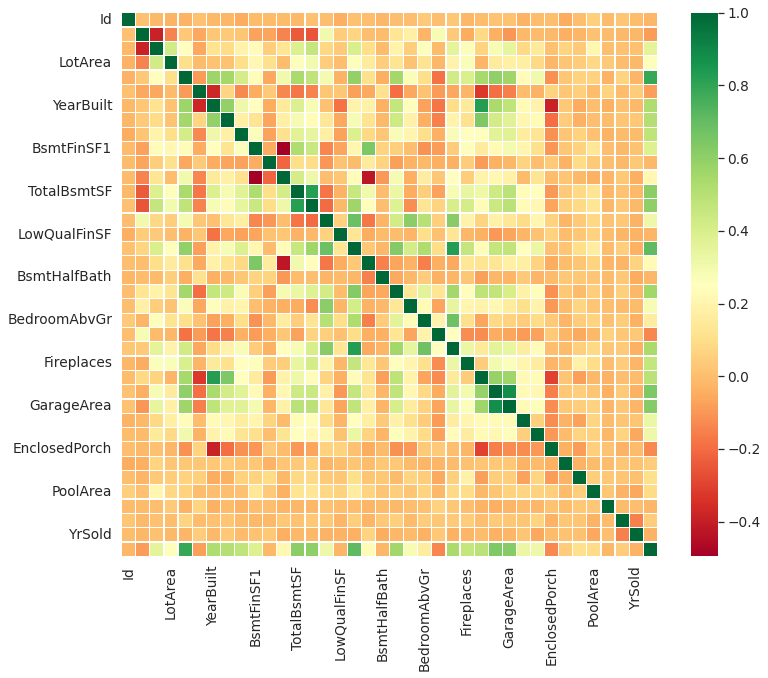

In [ ]:
ames_corr = ames.corr()
sns.heatmap(ames_corr, cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,10)
plt.show()

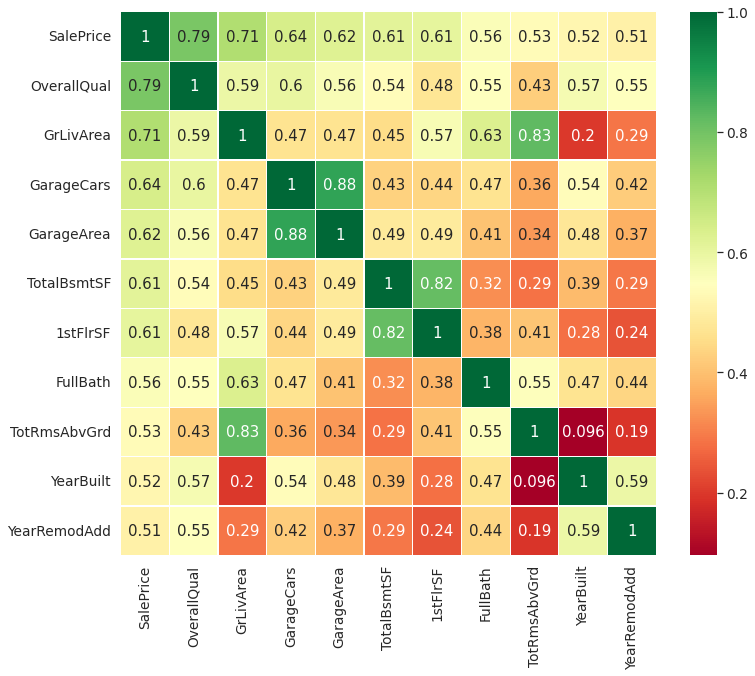

In [ ]:
high_corr_cols = ames_corr.nlargest(11, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(ames[high_corr_cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, annot=True, cmap = 'RdYlGn', linewidths = 0.2, yticklabels=high_corr_cols.values, xticklabels=high_corr_cols.values)
fig = plt.gcf()
fig.set_size_inches(12,10)
plt.show()


* `GarageCars` - size of garage in car capacity and `GarageArea` - size of garage in square feet strongly-correlated. The no. of cars that fit into the garage is a consequence of the garage area; therefore we just need one of these variables. We'll keep `GarageCars` as slightly more strongly correlated.
* Same with `TotalBsmtSF` & `1stFlrSF`. We will keep `1stFlrSF`.
* Same with `TotRmsAbvGrd` - total rooms above grade (excluding bathrooms) & `GrLivArea` - Above grade (ground) living area in square feet


---



---



In [ ]:
###initiate list of columns to drop
cols_to_drop=['GarageArea','TotalBsmtSF','TotRmsAbvGrd']


### Check relationship between the variables 

#### Relationship between numerical columns and sale price





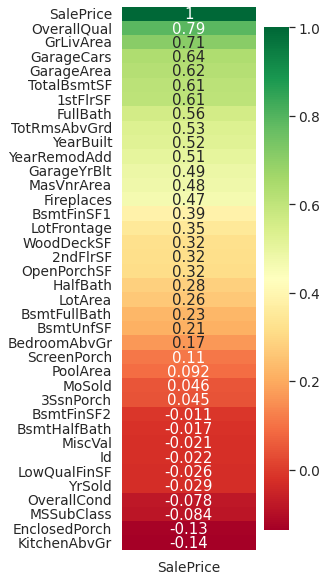

In [ ]:
target_corr = ames_corr[['SalePrice']].sort_values(by=['SalePrice'],ascending=False)
plt.figure(figsize=(3,10))
sns.heatmap(target_corr, annot = True, cmap = 'RdYlGn')

**Observations - Highly-correlated variables (above 0.5 or below 0.5)**
* `OverallQual` - 0.79
* `YearBuilt` - 0.52
* `YearRemodAdd` - 0.51
* `TotalBsmtSF` - 0.61
* `1stFlrSF` - 0.61
* `GrLivArea` - 0.71
* `FullBath` - 0.56
* `TotRmsAbvGrd` - 0.53
* `GarageCars` - 0.64
* `GarageArea` - 0.62

For simplicity, we will drop the columns with correlation under 0.4. 


In [ ]:
corr = ames.corr()['SalePrice']
low_corr_cols = list(corr[(corr.abs()<0.05)].index)
cols_to_drop += low_corr_cols
print(cols_to_drop)

['GarageArea', 'TotalBsmtSF', 'TotRmsAbvGrd', 'Id', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', '3SsnPorch', 'MiscVal', 'MoSold', 'YrSold']


## Feature Engineering

Before we look at the categorical values more closely, let's see if we can remove some columns.

Let's remove features with many missing values, diving deeper into potential categorical feautres, and transofmring text and numerical columns. 

We will create a new function transform_feature() so that any column from the dataframe with more than 25% missing values is dropped. **why 25%??** 

We also need to remove any columns that leak information about the sale (e..g like hte year the sale happened). In general, the goal of this function is to:

* remove features that we don't want to use in the model, just based on the no. of missing values or data leakage
* transform features into the proper format (numerical to categorical, scaling numerical, filling in missing values, etc)
* create new features by combining other features

Next, we need to get more familiar with the remaining columns by reading the data documentation for each column to determine what transformations are necessary (if any) and more. 

### Check Missing Values

In [ ]:
def check_missing_vals(df):
  total_missing = df.isnull().sum()
  percent_missing = ((df.isnull().sum()/df.isnull().count()))*100
  if 'SalePrice' in df.columns: 
    saleprice_corr = df.corr()['SalePrice'].abs()
  else:
    saleprice_corr = (df.count())*np.NaN
  missing_vals = pd.concat([total_missing, percent_missing, saleprice_corr], axis=1,keys=['TotalMissing','PercentMissing', 'CorrCoeff.'])
  missing_vals_df = missing_vals[total_missing>0].sort_values(ascending=False,by='TotalMissing')
  print(missing_vals_df)
  
check_missing_vals(ames)

              TotalMissing  PercentMissing  CorrCoeff.
PoolQC                1453       99.520548         NaN
MiscFeature           1406       96.301370         NaN
Alley                 1369       93.767123         NaN
Fence                 1179       80.753425         NaN
FireplaceQu            690       47.260274         NaN
LotFrontage            259       17.739726    0.351799
GarageType              81        5.547945         NaN
GarageYrBlt             81        5.547945    0.486362
GarageFinish            81        5.547945         NaN
GarageQual              81        5.547945         NaN
GarageCond              81        5.547945         NaN
BsmtExposure            38        2.602740         NaN
BsmtFinType2            38        2.602740         NaN
BsmtFinType1            37        2.534247         NaN
BsmtCond                37        2.534247         NaN
BsmtQual                37        2.534247         NaN
MasVnrArea               8        0.547945    0.477493
MasVnrType

### Missing Values - Test

In [ ]:
check_missing_vals(ames_test)

              TotalMissing  PercentMissing  CorrCoeff.
PoolQC                1456       99.794380         NaN
MiscFeature           1408       96.504455         NaN
Alley                 1352       92.666210         NaN
Fence                 1169       80.123372         NaN
FireplaceQu            730       50.034270         NaN
LotFrontage            227       15.558602         NaN
GarageCond              78        5.346127         NaN
GarageYrBlt             78        5.346127         NaN
GarageQual              78        5.346127         NaN
GarageFinish            78        5.346127         NaN
GarageType              76        5.209047         NaN
BsmtCond                45        3.084304         NaN
BsmtExposure            44        3.015764         NaN
BsmtQual                44        3.015764         NaN
BsmtFinType1            42        2.878684         NaN
BsmtFinType2            42        2.878684         NaN
MasVnrType              16        1.096642         NaN
MasVnrArea

### Remove columns with more than 15% missing values

We checked that none are highly correlated to Sale Price

* PoolQC - Pool Quality 
* MiscFeature - Miscellaneous feature not covered in other categories e.g. Elevator, 2nd Garage, Other, Shed, etc.
* Alley - Type of alley access to property (Gravel, paved, no alley access)
* Fence - Fence quality, good privacy, minimum privacy, good wood,, minimum wood/ wire
* FireplaceQu - Fireplace quality
* LotFrontage - Linear feet of street connected to property

In [ ]:
#drop columns with over 15% missing values

percent_missing = ((ames.isnull().sum()/ames.isnull().count()))*100
over_15_missing = list(percent_missing[percent_missing>15].index)
cols_to_drop += over_15_missing
print(cols_to_drop)


['GarageArea', 'TotalBsmtSF', 'TotRmsAbvGrd', 'Id', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', '3SsnPorch', 'MiscVal', 'MoSold', 'YrSold', 'LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


### Drop Columns that Leak Information About the Target

Data leakage is a problem that can generate overfitting. It refers to columns that reveal information about the sale that would most probably not be available until the moment the house is sold. 

Therefore, these features should not be included in the model. Below, we identify 3 columns which may leak data from the target column.

In [ ]:
data_leak_cols = ['SaleCondition', 'SaleType', 'YrSold', 'MoSold']
cols_to_drop += data_leak_cols
print(cols_to_drop)


['GarageArea', 'TotalBsmtSF', 'TotRmsAbvGrd', 'Id', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', '3SsnPorch', 'MiscVal', 'MoSold', 'YrSold', 'LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'SaleCondition', 'SaleType', 'YrSold', 'MoSold']


In [ ]:
## we can now drop YearBuilt & YearRemodAdd as well as other irrelevant columns

cols_to_drop += ['YearBuilt', 'YearRemodAdd', 'Id', 'GarageYrBlt']
print(cols_to_drop)

['GarageArea', 'TotalBsmtSF', 'TotRmsAbvGrd', 'Id', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', '3SsnPorch', 'MiscVal', 'MoSold', 'YrSold', 'LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'SaleCondition', 'SaleType', 'YrSold', 'MoSold', 'YearBuilt', 'YearRemodAdd', 'Id', 'GarageYrBlt']


### Imputing Missing Values - Garage

Based on the data documentation, the value **NA** in the following columns suggests **'None'** - Not applicable

* `GarageType` - Garage Location
* `GarageYrBlt`
* `GarageFinish`
* `GarageQual`
* `GarageCond`

In [ ]:
### imputing missing values - garage columns

garage_cols = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']
missing_garage_df = ames[ames[garage_cols].isnull().all(1)]
print(missing_garage_df[garage_cols])

     GarageType  GarageYrBlt GarageFinish GarageQual GarageCond
39          NaN          NaN          NaN        NaN        NaN
48          NaN          NaN          NaN        NaN        NaN
78          NaN          NaN          NaN        NaN        NaN
88          NaN          NaN          NaN        NaN        NaN
89          NaN          NaN          NaN        NaN        NaN
...         ...          ...          ...        ...        ...
1349        NaN          NaN          NaN        NaN        NaN
1407        NaN          NaN          NaN        NaN        NaN
1449        NaN          NaN          NaN        NaN        NaN
1450        NaN          NaN          NaN        NaN        NaN
1453        NaN          NaN          NaN        NaN        NaN

[81 rows x 5 columns]


In [ ]:
missing_garage_df['SalePrice'].describe()

count        81.000000
mean     103317.283951
std       32815.023389
min       34900.000000
25%       82500.000000
50%      100000.000000
75%      124000.000000
max      200500.000000
Name: SalePrice, dtype: float64

In [ ]:
ames[garage_cols].value_counts()

GarageType  GarageYrBlt  GarageFinish  GarageQual  GarageCond
Attchd      2006.0       RFn           TA          TA            33
            2005.0       Fin           TA          TA            28
            2007.0       Fin           TA          TA            21
            2004.0       RFn           TA          TA            20
            2005.0       RFn           TA          TA            19
                                                                 ..
            1987.0       Unf           TA          TA             1
Detchd      1920.0       Unf           Po          Po             1
                                       TA          Fa             1
Attchd      1987.0       RFn           TA          TA             1
2Types      1920.0       Unf           Fa          Fa             1
Length: 437, dtype: int64

**Here I'm trying to show that Garage columns are probably okay to replace with None**

I would expect the `missing_garage_df` to be on the lower end of the `SalePrice` range.. 

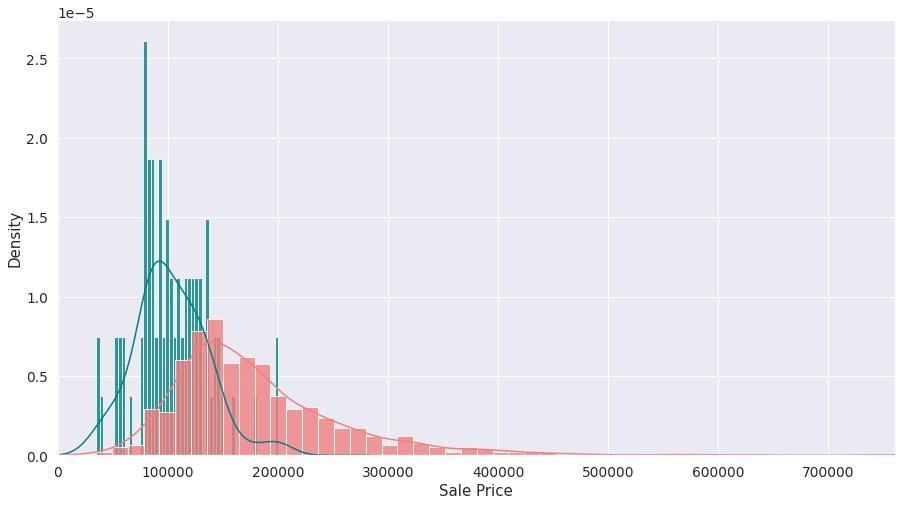

In [ ]:
plt.figure(figsize=(15,8))
ax = missing_garage_df['SalePrice'].hist(bins=50, density=True, stacked=True, color='teal', alpha=0.8)
missing_garage_df['SalePrice'].plot(kind='density', color='teal')
ames['SalePrice'].hist(bins=50, density=True, stacked=True, color='lightcoral', alpha=0.8)
ames['SalePrice'].plot(kind='density', color='lightcoral')
ax.set(xlabel='Sale Price')
plt.xlim(0,760000)
plt.show()

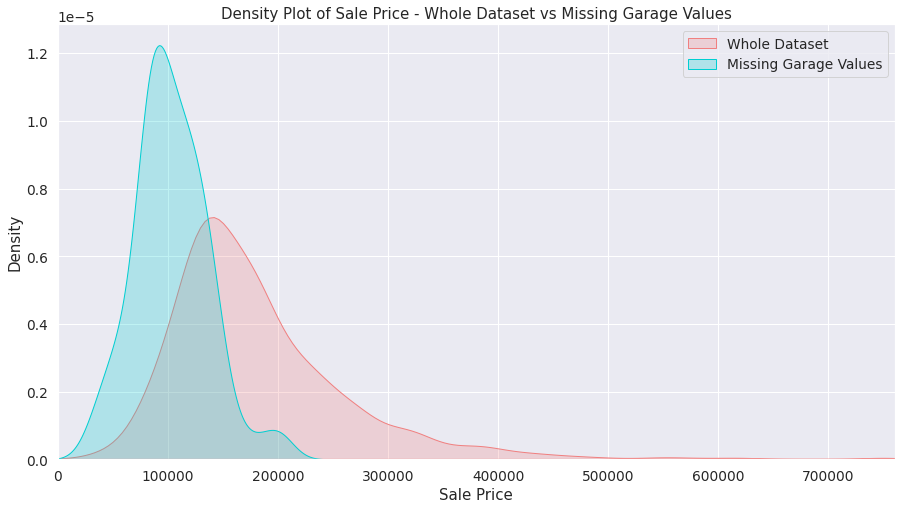

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(ames['SalePrice'], color='lightcoral', shade = True)
sns.kdeplot(missing_garage_df['SalePrice'], color='darkturquoise', shade = True)
plt.legend(['Whole Dataset', 'Missing Garage Values'])
plt.title('Density Plot of Sale Price - Whole Dataset vs Missing Garage Values')
ax.set(xlabel = 'Sale Price')
plt.xlim(0, 760000)
plt.show()

### imputing missing values - Basement
* BsmtExposure            38
* BsmtFinType2            38 
* BsmtFinType1            37 
* BsmtCond                37 
* BsmtQual                37 

In [ ]:
### imputing missing values - Basement
#BsmtExposure            38        2.602740         NaN
#BsmtFinType2            38        2.602740         NaN
#BsmtFinType1            37        2.534247         NaN
#BsmtCond                37        2.534247         NaN
#BsmtQual                37        2.534247         NaN

bsmt_cols = ['BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']
missing_bsmt_df = ames[ames[bsmt_cols].isnull().all(1)]
print(missing_bsmt_df[bsmt_cols])

     BsmtExposure BsmtFinType2 BsmtFinType1 BsmtCond BsmtQual
17            NaN          NaN          NaN      NaN      NaN
39            NaN          NaN          NaN      NaN      NaN
90            NaN          NaN          NaN      NaN      NaN
102           NaN          NaN          NaN      NaN      NaN
156           NaN          NaN          NaN      NaN      NaN
182           NaN          NaN          NaN      NaN      NaN
259           NaN          NaN          NaN      NaN      NaN
342           NaN          NaN          NaN      NaN      NaN
362           NaN          NaN          NaN      NaN      NaN
371           NaN          NaN          NaN      NaN      NaN
392           NaN          NaN          NaN      NaN      NaN
520           NaN          NaN          NaN      NaN      NaN
532           NaN          NaN          NaN      NaN      NaN
533           NaN          NaN          NaN      NaN      NaN
553           NaN          NaN          NaN      NaN      NaN
646     

In [ ]:
missing_bsmt_df.shape

(37, 81)

In [ ]:
ames[bsmt_cols].value_counts()

BsmtExposure  BsmtFinType2  BsmtFinType1  BsmtCond  BsmtQual
No            Unf           Unf           TA        TA          148
                                                    Gd          136
                            GLQ           TA        Gd          126
Av            Unf           GLQ           TA        Gd           74
No            Unf           ALQ           TA        TA           73
                                                               ... 
Mn            Unf           LwQ           TA        Gd            1
Gd            LwQ           GLQ           Gd        Gd            1
                                          TA        Gd            1
                                                    TA            1
Av            ALQ           BLQ           TA        Gd            1
Length: 178, dtype: int64

### Imputing Missing Values - Masonry Veneer Type & Masonry Veneer Area


In [ ]:
### imputing missing values 
# MasVnrArea               8        0.547945    0.477493
# MasVnrType               8        0.547945         NaN
ames['MasVnrType'].value_counts(normalize=True)

None       0.595041
BrkFace    0.306474
Stone      0.088154
BrkCmn     0.010331
Name: MasVnrType, dtype: float64

Approx. 60% of houses have been recorded as having no masonry. 

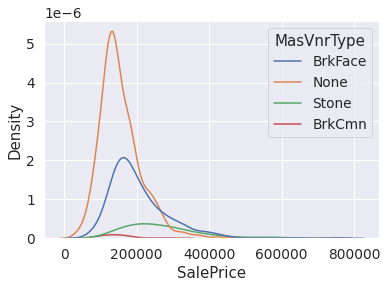

In [ ]:
sns.kdeplot(data=ames, x='SalePrice', hue='MasVnrType')

In [ ]:
masvnr_cols = ['MasVnrArea', 'MasVnrType']
missing_masvnr_df = ames[ames[masvnr_cols].isnull().all(1)]
print(missing_masvnr_df[masvnr_cols])

      MasVnrArea MasVnrType
234          NaN        NaN
529          NaN        NaN
650          NaN        NaN
936          NaN        NaN
973          NaN        NaN
977          NaN        NaN
1243         NaN        NaN
1278         NaN        NaN


In [ ]:
missing_masvnr_df['SalePrice'].value_counts()

216500    1
200624    1
205950    1
184900    1
182000    1
199900    1
465000    1
237000    1
Name: SalePrice, dtype: int64

In [ ]:
nomasvnr_df = ames[ames['MasVnrType']=='None']
brkface_df = ames[ames['MasVnrType']=='BrkFace']
stone_df = ames[ames['MasVnrType']=='Stone']

If `SalePrice`> 450k, replace with BrkFace (Brick Face) or Stone? 

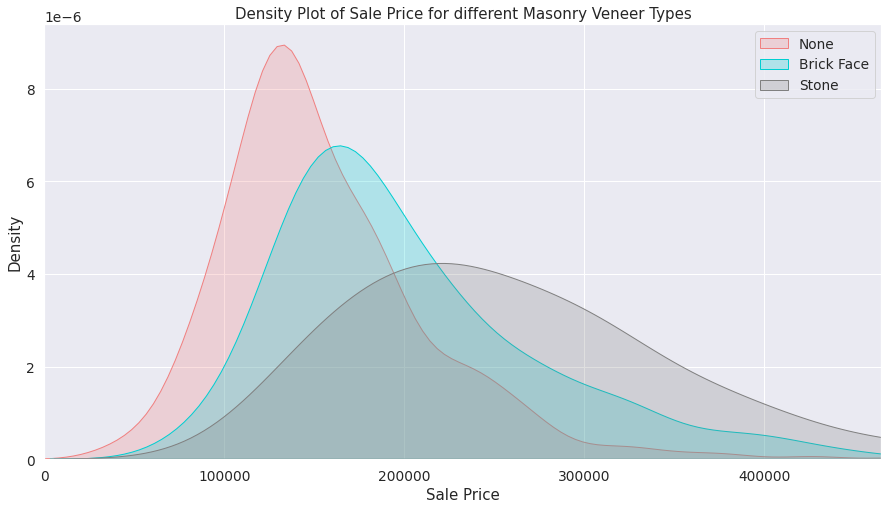

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(nomasvnr_df['SalePrice'], color='lightcoral', shade = True)
sns.kdeplot(brkface_df['SalePrice'], color='darkturquoise', shade = True)
sns.kdeplot(stone_df['SalePrice'],color='grey',shade=True)
plt.legend(['None', 'Brick Face', 'Stone'])
plt.title('Density Plot of Sale Price for different Masonry Veneer Types')
ax.set(xlabel = 'Sale Price')
plt.xlim(0, 465000)
plt.show()

In [ ]:
nomasvnr_df['SalePrice'].describe()

count       864.000000
mean     156221.891204
std       60708.262798
min       34900.000000
25%      118991.000000
50%      143000.000000
75%      181875.000000
max      745000.000000
Name: SalePrice, dtype: float64

In [ ]:
brkface_df['SalePrice'].describe()

count       445.000000
mean     204691.871910
std       81214.293554
min       75000.000000
25%      149300.000000
50%      181000.000000
75%      236000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [ ]:
stone_df['SalePrice'].describe()

count       128.000000
mean     265583.625000
std       99940.156577
min      119000.000000
25%      194650.000000
50%      246839.000000
75%      312779.000000
max      611657.000000
Name: SalePrice, dtype: float64

In [ ]:
brkface_mean = round(brkface_df['MasVnrArea'].mean(),1)
stone_mean = round(stone_df['MasVnrArea'].mean(),1)

print(f'Average Masonry Veneer Area: \n Brick Face: {brkface_mean} \n Stone: {stone_mean} ')


Average Masonry Veneer Area: 
 Brick Face: 259.0 
 Stone: 239.3 


In [ ]:
median_area_per_type = ames.groupby('MasVnrType')['MasVnrArea'].median()
median_area = round(median_area_per_type)

mean_area_per_type = ames.groupby('MasVnrType')['MasVnrArea'].mean()
mean_area = round(mean_area_per_type)

area_per_type = pd.concat([median_area, mean_area], axis=1)
print(area_per_type)


            MasVnrArea  MasVnrArea
MasVnrType                        
BrkCmn           192.0       248.0
BrkFace          202.0       259.0
None               0.0         1.0
Stone            206.0       239.0


I will not directly fill the missing values with NaNs, with the median, or mean of Masonry Veneer Area. 

### Dealing with missing values - `Electrical`

* `SBrkr`	Standard Circuit Breakers & Romex
* `FuseA`	Fuse Box over 60 AMP and all Romex wiring (Average)	
* `FuseF`	60 AMP Fuse Box and mostly Romex wiring (Fair)
* `FuseP`	60 AMP Fuse Box and mostly knob & tube wiring (poor)
* `Mix`	Mixed

In [ ]:
ames['Electrical'].value_counts(normalize=True)

SBrkr    0.914325
FuseA    0.064428
FuseF    0.018506
FuseP    0.002056
Mix      0.000685
Name: Electrical, dtype: float64

### Dealing with Categorical Values
* columns to category = MSSubClass & OverallCond
* irrelevant columns - 'LandContour', 'Utilities', 'LotConfig', 'Condition1', 'Condition2', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation', 'Heating', 'Electrical'


In [ ]:
irrelevant_cols = ['LandContour', 'Utilities', 'LotConfig', 'Condition1', 'Condition2', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation', 'Heating', 'Electrical']
cols_to_drop += irrelevant_cols
print(cols_to_drop)

['GarageArea', 'TotalBsmtSF', 'TotRmsAbvGrd', 'Id', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', '3SsnPorch', 'MiscVal', 'MoSold', 'YrSold', 'LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'SaleCondition', 'SaleType', 'YrSold', 'MoSold', 'YearBuilt', 'YearRemodAdd', 'Id', 'GarageYrBlt', 'LandContour', 'Utilities', 'LotConfig', 'Condition1', 'Condition2', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation', 'Heating', 'Electrical']


In [ ]:
### update transform_feats function to impute missing values

def transform_feats(df):

  # impute missing values
  for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    df[col] = df[col].fillna('None') #inplace=False (only change null values)

  for col in ['BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1']:
    df[col] = df[col].fillna('None')

  df["MasVnrType"] = df["MasVnrType"].fillna("None")
  df["MasVnrArea"] = df["MasVnrArea"].fillna(0)
  df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

  df['YrsSinceBuild'] = df['YrSold'] - df['YearBuilt']
  df['YrsSinceRemod'] = df['YrSold'] - df['YearRemodAdd']

  cols_to_cat = ['MSSubClass', 'OverallCond']
  for col in cols_to_cat:
    df[col] = df[col].astype(str)
  
  #def fill_area(x):
   #for index, mas_vnr_area in zip(median_area.index, median_area.values):
    #if x['MasVnrType'] == index:
     #return mas_vnr_area

  #df['MasVnrArea'] = df.apply(lambda x: fill_area(x) if np.isnan(df['MasVnrArea']) else x['MasVnrArea'], axis=1)

  #drop cols_to_drop
  df.drop(cols_to_drop, axis=1, inplace=True)

  return df

In [ ]:
transform_feats(ames)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandSlope,Neighborhood,BldgType,HouseStyle,OverallQual,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,SalePrice,YrsSinceBuild,YrsSinceRemod
0,60,RL,8450,Pave,Reg,Gtl,CollgCr,1Fam,2Story,7,...,TA,Y,0,61,0,0,0,208500,5,5
1,20,RL,9600,Pave,Reg,Gtl,Veenker,1Fam,1Story,6,...,TA,Y,298,0,0,0,0,181500,31,31
2,60,RL,11250,Pave,IR1,Gtl,CollgCr,1Fam,2Story,7,...,TA,Y,0,42,0,0,0,223500,7,6
3,70,RL,9550,Pave,IR1,Gtl,Crawfor,1Fam,2Story,7,...,TA,Y,0,35,272,0,0,140000,91,36
4,60,RL,14260,Pave,IR1,Gtl,NoRidge,1Fam,2Story,8,...,TA,Y,192,84,0,0,0,250000,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Pave,Reg,Gtl,Gilbert,1Fam,2Story,6,...,TA,Y,0,40,0,0,0,175000,8,7
1456,20,RL,13175,Pave,Reg,Gtl,NWAmes,1Fam,1Story,6,...,TA,Y,349,0,0,0,0,210000,32,22
1457,70,RL,9042,Pave,Reg,Gtl,Crawfor,1Fam,2Story,7,...,TA,Y,0,60,0,0,0,266500,69,4
1458,20,RL,9717,Pave,Reg,Gtl,NAmes,1Fam,1Story,5,...,TA,Y,366,0,112,0,0,142125,60,14


In [ ]:
check_missing_vals(ames)

Empty DataFrame
Columns: [TotalMissing, PercentMissing, CorrCoeff.]
Index: []


In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ('MSZoning','Street', 'LotShape', 'LandSlope', 'Neighborhood','BldgType','HouseStyle','MasVnrType','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','CentralAir','KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive')
# process columns, apply LabelEncoder to categorical features
for i in cols:
    le = LabelEncoder() 
    ames[i] = le.fit_transform(ames[i].astype(str))

ames

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandSlope,Neighborhood,BldgType,HouseStyle,OverallQual,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,SalePrice,YrsSinceBuild,YrsSinceRemod
0,60,3,8450,1,3,0,5,0,5,7,...,5,2,0,61,0,0,0,208500,5,5
1,20,3,9600,1,3,0,24,0,2,6,...,5,2,298,0,0,0,0,181500,31,31
2,60,3,11250,1,0,0,5,0,5,7,...,5,2,0,42,0,0,0,223500,7,6
3,70,3,9550,1,0,0,6,0,5,7,...,5,2,0,35,272,0,0,140000,91,36
4,60,3,14260,1,0,0,15,0,5,8,...,5,2,192,84,0,0,0,250000,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,7917,1,3,0,8,0,5,6,...,5,2,0,40,0,0,0,175000,8,7
1456,20,3,13175,1,3,0,14,0,2,6,...,5,2,349,0,0,0,0,210000,32,22
1457,70,3,9042,1,3,0,6,0,5,7,...,5,2,0,60,0,0,0,266500,69,4
1458,20,3,9717,1,3,0,12,0,2,5,...,5,2,366,0,112,0,0,142125,60,14


In [ ]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 49 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   int64  
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   int64  
 4   LotShape       1460 non-null   int64  
 5   LandSlope      1460 non-null   int64  
 6   Neighborhood   1460 non-null   int64  
 7   BldgType       1460 non-null   int64  
 8   HouseStyle     1460 non-null   int64  
 9   OverallQual    1460 non-null   int64  
 10  OverallCond    1460 non-null   object 
 11  MasVnrType     1460 non-null   int64  
 12  MasVnrArea     1460 non-null   float64
 13  ExterQual      1460 non-null   int64  
 14  ExterCond      1460 non-null   int64  
 15  BsmtQual       1460 non-null   int64  
 16  BsmtCond       1460 non-null   int64  
 17  BsmtExposure   1460 non-null   int64  
 18  BsmtFinT

In [ ]:
X = ames.drop(['SalePrice'], axis=1)
y = ames['SalePrice']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor 


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
lr_mod = LinearRegression() # define Linear Regression model
lr_mod.fit(X_train, y_train) # fit model onto training data
lr_pred = lr_mod.predict(X_test) # make prediction based on test data


In [ ]:
lr_mse = mean_squared_error(y_test,lr_pred) # calculate mean squared error
lr_rmse = mean_squared_error(y_test,lr_pred)**0.5 # calculate root mean squared error
print("Mean squared error: %.2f" % lr_mse)
print("Root mean squared error: %.2f" % lr_rmse)

Mean squared error: 1171966945.64
Root mean squared error: 34234.00


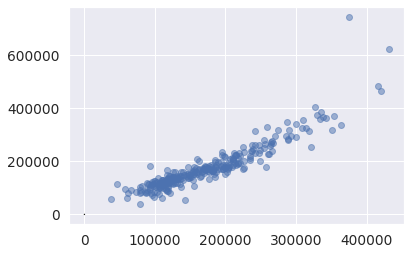

In [ ]:
plt.scatter(lr_pred, y_test, alpha=0.5) # plot scatter graph of predicted data from linear regression model vs test data
plt.plot(np.arange(15,40),np.arange(15,40), color='k')


In [ ]:
kn_mod = KNeighborsRegressor()
kn_mod.fit(X_train,y_train)
kn_pred = kn_mod.predict(X_test)

In [ ]:
kn_mse = mean_squared_error(y_test,kn_pred)
kn_rmse = mean_squared_error(y_test,kn_pred)**0.5 # calculate root mean squared error
print("Mean squared error: %.2f" % kn_mse)
print("Root mean squared error: %.2f" % kn_rmse)


Mean squared error: 1847618967.70
Root mean squared error: 42983.94


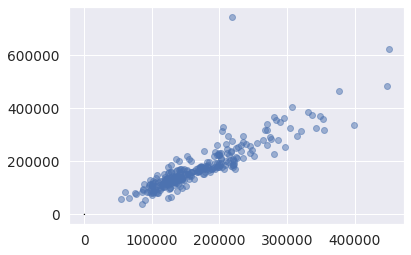

In [ ]:
plt.scatter(kn_pred, y_test, alpha = 0.5) #plot scatter graph of predicted data from kneighbors regressor model vs test data
plt.plot(np.arange(15,40),np.arange(15,40), color='black')
plt.show()

In [ ]:
la_mod = Lasso(alpha=0.05)
la_mod.fit(X_train,y_train)
la_pred = la_mod.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.130e+11, tolerance: 7.116e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
la_mse = mean_squared_error(y_test,la_pred)
la_rmse = mean_squared_error(y_test,la_pred)**0.5 # calculate root mean squared error
print("Mean squared error: %.2f" % la_mse)
print("Root mean squared error: %.2f" % la_rmse)

Mean squared error: 1171907180.36
Root mean squared error: 34233.13


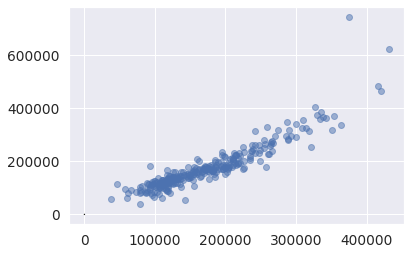

In [ ]:
plt.scatter(la_pred, y_test, alpha = 0.5) #plot scatter graph of predicted data from lasso model vs test data
plt.plot(np.arange(15,40),np.arange(15,40), color='k')

In [ ]:
rr_mod = Ridge(alpha=0.05)
rr_mod.fit(X_train,y_train)
rr_pred = rr_mod.predict(X_test)

In [ ]:
rr_mse = mean_squared_error(y_test,rr_pred)
rr_rmse = mean_squared_error(y_test,rr_pred)**0.5 # calculate root mean squared error
print("Mean squared error: %.2f" % rr_mse)
print("Root mean squared error: %.2f" % rr_rmse)

Mean squared error: 1171858699.42
Root mean squared error: 34232.42


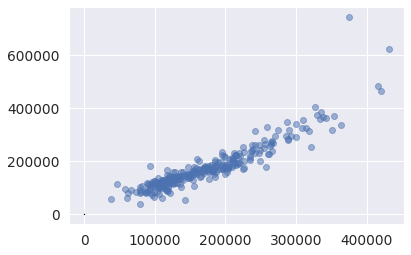

In [ ]:
plt.scatter(rr_pred, y_test, alpha = 0.5) #plot scatter graph oh predicted data from ridge regression model vs test data
plt.plot(np.arange(15,40),np.arange(15,40), color='black')

In [ ]:
br_mod = BayesianRidge()
br_mod.fit(X_train,y_train)
br_pred = br_mod.predict(X_test)

In [ ]:
br_mse = mean_squared_error(y_test,br_pred)
br_rmse = mean_squared_error(y_test,br_pred)**0.5 # calculate root mean squared error
print("Mean squared error: %.2f" % br_mse)
print("Root mean squared error: %.2f" % br_rmse)

Mean squared error: 1163176288.49
Root mean squared error: 34105.37


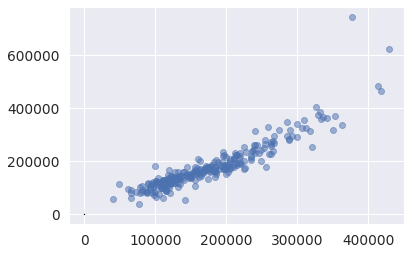

In [ ]:
plt.scatter(br_pred, y_test, alpha=0.5) #plot scatter graph of predicted data from bayesian ridge model vs test data
plt.plot(np.arange(15,40),np.arange(15,40), color='black') # 

In [ ]:
rf_mod = RandomForestRegressor()
rf_mod.fit(X_train,y_train)
rf_pred = rf_mod.predict(X_test)

In [ ]:
rf_mse = mean_squared_error(y_test,rf_pred) #calculate mean squared error
rf_rmse = mean_squared_error(y_test,rf_pred)**0.5 # calculate root mean squared error
print("Mean squared error: %.2f" % rf_mse)
print("Root mean squared error: %.2f" % rf_rmse)

Mean squared error: 601720512.04
Root mean squared error: 24529.99


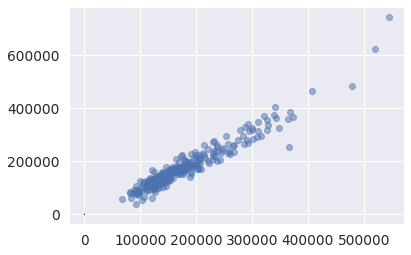

In [ ]:
plt.scatter(rf_pred, y_test, alpha=0.5) #plot scatter graph of predicted data from random forest model vs test data
plt.plot(np.arange(15,40),np.arange(15,40), color='k') # plot 1:1

### Submission

In [412]:
!git push origin master

fatal: not a git repository (or any of the parent directories): .git
